C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\werka\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\werka\miniconda3\e

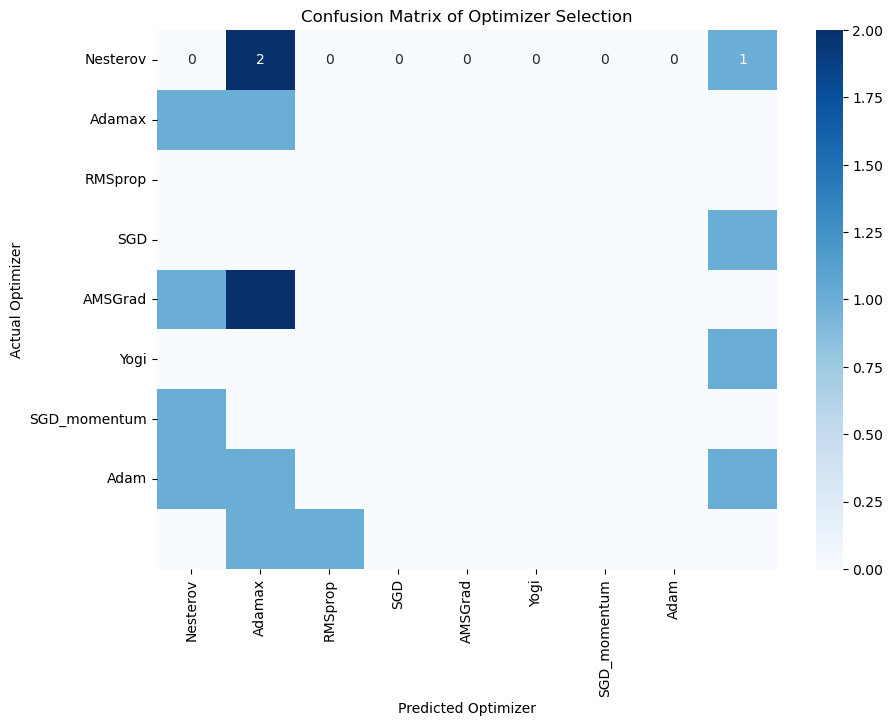

Classification Report:
              precision    recall  f1-score   support

     AMSGrad       0.00      0.00      0.00         3
        Adam       0.14      0.50      0.22         2
       AdamW       0.00      0.00      0.00         0
      Adamax       0.00      0.00      0.00         1
    Nesterov       0.00      0.00      0.00         3
     RMSprop       0.00      0.00      0.00         1
         SGD       0.00      0.00      0.00         1
SGD_momentum       0.00      0.00      0.00         3
        Yogi       0.00      0.00      0.00         2

    accuracy                           0.06        16
   macro avg       0.02      0.06      0.02        16
weighted avg       0.02      0.06      0.03        16



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def select_optimizer(data_name, metric, df):
    """
    Select the best optimizer based on the given data name, evaluation metric, 
    and the information in the provided DataFrame.

    Parameters:
    - data_name: str, name of the dataset
    - metric: str, evaluation metric (e.g., 'F1-score', 'Training Time')
    - df: pandas DataFrame, containing dataset information
    
    Returns:
    - str, the selected optimizer
    """
    # Get the corresponding row for the given data name
    row = df[df['Data Name'] == data_name].iloc[0]
    
    # Extract the necessary values
    data_size = row['Data Size']
    num_features = row['Number of Features']
    neural_network = row['Neural Network Architecture']
    
    # Recommendations based on data size and number of features
    if data_size < 1000:
        if num_features <= 20:
            if neural_network == 'FNN':
                return 'AMSGrad' # 'Adam'
            elif neural_network == 'CNN':
                return 'Adam'
            elif neural_network == 'LSTM':
                return 'Adam'
        elif 20 < num_features <= 40:
            if neural_network == 'FNN':
                return 'Yogi'
            elif neural_network == 'CNN':
                return 'Adam'
            elif neural_network == 'LSTM':
                return 'Adam'  
        elif num_features > 40:
            if neural_network == 'FNN':
                return 'Adam'     
            elif neural_network == 'CNN':
                return 'Adam'
            elif neural_network == 'LSTM':
                return 'Adam'      
    elif data_size < 5000:
        if num_features <= 20:
            if neural_network == 'FNN':
                return 'AdamW'   
            elif neural_network == 'CNN':
                return 'Adam'
            elif neural_network == 'LSTM':
                return 'Adam'   
        elif 20 < num_features <= 40:
            if neural_network == 'FNN':
                return 'Adam'     
            elif neural_network == 'CNN':
                return 'Adam'
            elif neural_network == 'LSTM':
                return 'Adam'
        elif num_features > 40:
            if neural_network == 'FNN':
                return 'AMSGrad'     
            elif neural_network == 'CNN':
                return 'Adam'   
            elif neural_network == 'LSTM':
                return 'Adam'      
        
    elif data_size >= 5000:
        if num_features <= 20:
            if neural_network == 'FNN':
                return 'Adam'  
            elif neural_network == 'CNN':
                return 'Adam'
            elif neural_network == 'LSTM':
                return 'Adam'
        elif 20 < num_features <= 40:
            if neural_network == 'FNN':
                return 'Adam'  
            elif neural_network == 'CNN':
                return 'Adam'
            elif neural_network == 'LSTM':
                return 'Yogi'  
        elif num_features > 40:
            if neural_network == 'FNN':
                return 'Adam'  #####
            elif neural_network == 'CNN':
                return 'Adam'
            elif neural_network == 'LSTM':
                return 'Adamax'

    # Default case if none of the rules match
    return "Adam"

# Load the CSV file
csv_file = 'neural_network_results-15-05.csv'
df = pd.read_csv(csv_file)

# Normalize F1-score and Training Time
df['Normalized F1-score'] = df['F1-score'] / df['F1-score'].max()
df['Normalized Training Time'] = df['Training Time'].max() / df['Training Time']

# Create a composite score
df['Composite Score'] = df['Normalized F1-score'] * 0.3 + df['Normalized Training Time'] * 0.7

# Generate predictions and actual values
predicted_optimizers = []
actual_optimizers = []

for data_name in df['Data Name'].unique():
    # Filter rows for the specific dataset
    data_df = df[df['Data Name'] == data_name]
    # Determine the actual best optimizer based on highest F1-score
    best_optimizer = data_df.loc[data_df['Composite Score'].idxmax(), 'Optimization Method']
    actual_optimizers.append(best_optimizer)
    # Get predicted optimizer
    predicted_optimizer = select_optimizer(data_name, 'F1-score', df)
    predicted_optimizers.append(predicted_optimizer)

# Compute the confusion matrix
cm = confusion_matrix(actual_optimizers, predicted_optimizers)
report = classification_report(actual_optimizers, predicted_optimizers)

# Visualization of Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(actual_optimizers), yticklabels=set(actual_optimizers))
plt.xlabel('Predicted Optimizer')
plt.ylabel('Actual Optimizer')
plt.title('Confusion Matrix of Optimizer Selection')
plt.show()

# Print classification report
print("Classification Report:")
print(report)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def select_optimizer(data_name, metric, df):
    """
    Select the best optimizer based on the given data name, evaluation metric, 
    and the information in the provided DataFrame.

    Parameters:
    - data_name: str, name of the dataset
    - metric: str, evaluation metric (e.g., 'F1-score', 'Training Time')
    - df: pandas DataFrame, containing dataset information
    
    Returns:
    - str, the selected optimizer
    """
    # Get the corresponding row for the given data name
    row = df[df['Data Name'] == data_name].iloc[0]
    
    # Extract the necessary values
    data_size = row['Data Size']
    num_features = row['Number of Features']
    neural_network = row['Neural Network Architecture']
    
    # Recommendations based on data size and number of features
    if data_size < 1000:
        if num_features <= 15:
            if neural_network == 'FNN':
                return 'Adam'
            elif neural_network == 'CNN':
                return 'AMSGrad'
            elif neural_network == 'LSTM':
                return 'AdamW'
            else:
                return 'Adagrad'
        elif 16 <= num_features <= 30:
            if neural_network == 'FNN':
                return 'Adagrad'
            elif neural_network == 'CNN':
                return 'AMSGrad'
            else:
                return 'AdamW'
        elif num_features > 30:
            if neural_network == 'LSTM':
                return 'AdamW'
    elif data_size < 4000:
        if num_features <= 15:
            if neural_network == 'FNN':
                return 'Yogi'
        elif 16 <= num_features <= 30:
            if neural_network == 'CNN':
                return 'SGD Momentum'
            else:
                return 'Adagrad'
    elif data_size >= 4000:
        if num_features <= 15:
            if neural_network == 'LSTM':
                return 'Adam'
        elif 16 <= num_features <= 30:
            return 'Nesterov'
        elif num_features > 30:
            if neural_network == 'FNN':
                return 'Adam'

    # Default case if none of the rules match
    return "Adam"

# Load the CSV file
csv_file = 'neural_network_results-15-05.csv'
df = pd.read_csv(csv_file)

# Normalize F1-score and Training Time
df['Normalized F1-score'] = df['F1-score'] / df['F1-score'].max()
df['Normalized Training Time'] = df['Training Time'].max() / df['Training Time']

# Create a composite score
df['Composite Score'] = df['Normalized F1-score'] * 1.0 + df['Normalized Training Time'] * 0.0

# Generate predictions and actual values
predicted_optimizers = []
actual_optimizers = []

for data_name in df['Data Name'].unique():
    # Filter rows for the specific dataset
    data_df = df[df['Data Name'] == data_name]
    # Determine the actual best optimizer based on highest F1-score
    best_optimizer = data_df.loc[data_df['Composite Score'].idxmax(), 'Optimization Method']
    actual_optimizers.append(best_optimizer)
    # Get predicted optimizer
    predicted_optimizer = select_optimizer(data_name, 'F1-score', df)
    predicted_optimizers.append(predicted_optimizer)

# Compute the confusion matrix
cm = confusion_matrix(actual_optimizers, predicted_optimizers)
report = classification_report(actual_optimizers, predicted_optimizers)

# Visualization of Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(actual_optimizers), yticklabels=set(actual_optimizers))
plt.xlabel('Predicted Optimizer')
plt.ylabel('Actual Optimizer')
plt.title('Confusion Matrix of Optimizer Selection')
plt.show()

# Print classification report
print("Classification Report:")
print(report)
